In [1]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Flatten,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths for the dataset

train_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train'
# /kaggle/input/tomato
valid_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid'

In [3]:
image_height, image_width = 224, 224
num_channels = 3
num_classes = 10
batch_size = 16
epochs = 10

In [4]:
def train_val_generators(train_dir,valid_dir):
  train_datagen=ImageDataGenerator(rescale=1./255.,
                                 rotation_range = 40,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                   horizontal_flip=True)
  train_set=train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(image_height,image_width),
                                            batch_size=batch_size,
                                            class_mode='categorical')

  test_datagen=ImageDataGenerator(rescale=1./255)

  test_set=test_datagen.flow_from_directory(directory=valid_dir,
                                            target_size=(image_height,image_width),
                                           batch_size=batch_size,
                                            class_mode='categorical')
  return train_set,test_set

In [5]:
train_generator,vaild_generator=train_val_generators(train_path,valid_path)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


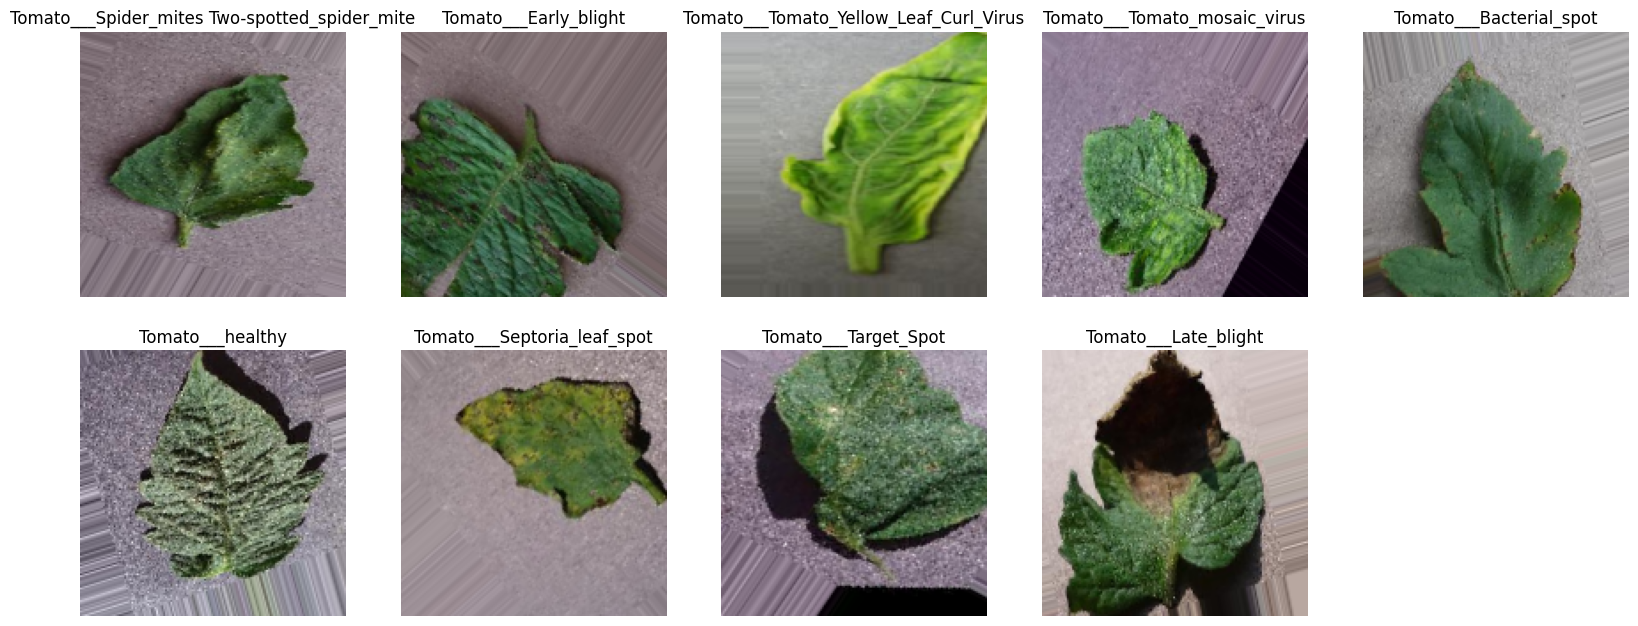

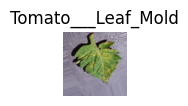

In [51]:
class_index=train_generator.class_indices
class_labels={v:k for k ,v in class_index.items()}
visited_classes=set()
plt.figure(figsize=(20, 20))
for image,labels in train_generator:
  for i in range(len(labels)):
    label_index=np.argmax(labels[i])
    if label_index not in visited_classes:
      plt.subplot(5,5,len(visited_classes)+1)
      plt.imshow(image[i])
      plt.title(class_labels[label_index])
      plt.axis('off')
      visited_classes.add(label_index)
    if len(visited_classes)==len(class_labels):
      break
  if len(visited_classes)==len(class_labels):
      break
  plt.show()


In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_height,image_width,num_channels)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history=model.fit(train_generator,validation_data=vaild_generator,epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1303s 1s/step - accuracy: 0.2992 - loss: 1.9191 - val_accuracy: 0.6024 - val_loss: 1.1293
Epoch 2/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1269s 1s/step - accuracy: 0.5987 - loss: 1.1224 - val_accuracy: 0.6938 - val_loss: 0.8465
Epoch 3/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1270s 1s/step - accuracy: 0.6807 - loss: 0.8883 - val_accuracy: 0.5852 - val_loss: 1.5258
Epoch 4/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1266s 1s/step - accuracy: 0.7211 - loss: 0.7772 - val_accuracy: 0.7029 - val_loss: 1.1806
Epoch 5/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1287s 1s/step - accuracy: 0.7619 - loss: 0.6941 - val_accuracy: 0.7954 - val_loss: 0.5834
Epoch 6/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1271s 1s/step - accuracy: 0.7810 - loss: 0.6240 - val_accuracy: 0.8076 - val_loss: 0.6202
Epoch 7/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1267s 1s/step - accuracy: 0.7940 - loss: 0.5993 - val_accuracy: 0.8046 - val_loss: 0.6949
Epoch 8/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1287s 1s/step - accuracy: 0.8088 - loss: 0.55

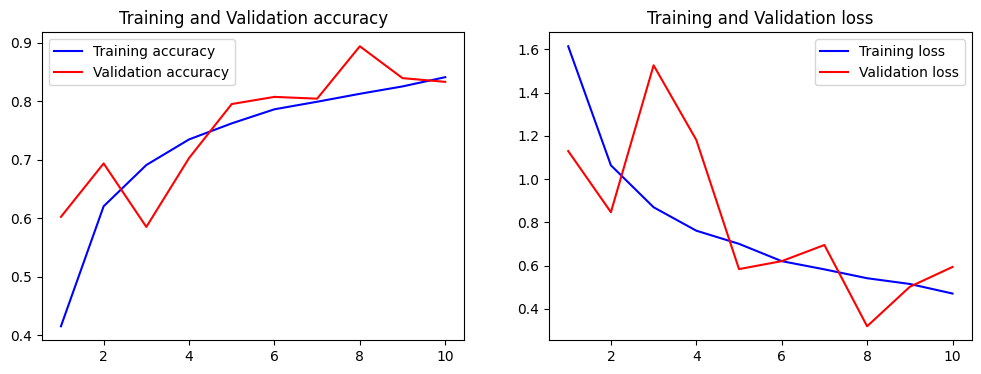

In [10]:
def plot_performance(history):


    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

# Call the function with the training history
plot_performance(history)

In [11]:
test_loss, test_accuracy = model.evaluate(vaild_generator, steps=len(vaild_generator))
print(f'Validation accuracy: {test_accuracy:.2f}')


287/287 ━━━━━━━━━━━━━━━━━━━━ 80s 279ms/step - accuracy: 0.8324 - loss: 0.6077
Validation accuracy: 0.83


In [12]:
training_loss, training_accuracy = model.evaluate(train_generator, steps=len(train_generator))
print(f'Training accuracy: {training_accuracy:.2f}')

1147/1147 ━━━━━━━━━━━━━━━━━━━━ 499s 435ms/step - accuracy: 0.8902 - loss: 0.3496
Training accuracy: 0.89


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


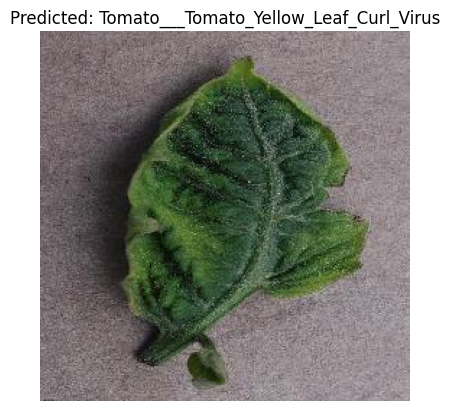

In [15]:
def predict_image(image_path, model):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make the prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=-1)
    return predicted_class[0]

def get_class_label(predicted_class, index_to_class):
    return index_to_class[predicted_class]

def visualize_prediction(image_path, predicted_class_label):
    # Load the image (original size) for visualization
    img = load_img(image_path)
    plt.imshow(img)

    # Set the title with the predicted label
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')

    # Display the image
    plt.show()

# Example usage
image_path = "/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/01933767-8827-4a46-b089-76b1d8397eb6___YLCV_GCREC 2539.JPG"
predicted_class = predict_image(image_path, model)
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
predicted_class_label = get_class_label(predicted_class, index_to_class)

# Visualize the prediction
visualize_prediction(image_path, predicted_class_label)

In [18]:
def download_history():
    import pickle
    with open('history.pkl', 'wb') as f:
        pickle.dump(history.history, f)
download_history()

model.save('model.h5')

In [19]:
model.save('model.h5')